In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filesurl = "/Users/mahmoudfathy/Developer/resources/datasets/free-spoken-digit-dataset/recordings/"
filename = "{}{}".format( filesurl, "9_yweweler_4.wav")

## Plot wav audio - time and amplitude 

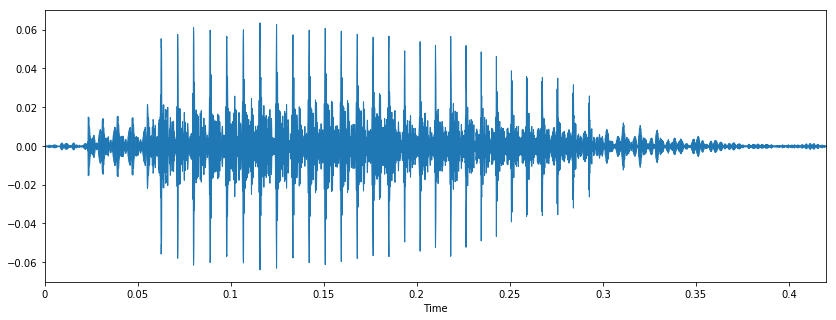

In [7]:
x, sr = librosa.load(filename)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Plot spectrogram audio - time, frequency and amplitude 

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Plot spectrogram audio - Y frequency axis as log scale

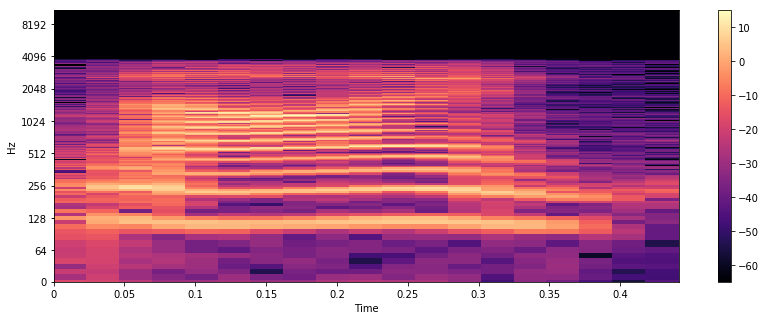

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [11]:
Xdb.shape

(1025, 19)

## Create tensor of audio recordings

### for all users saying "seven" 50 samples each

In [3]:
users = ["jackson", "nicolas", "theo", "yweweler"]
# dictionary of {name : [files of that name]}
filenames = dict(list(map(lambda name:\
         list((name, list(map(lambda x: "7_{}_{}.wav".format(name, x), \
             range(50))))), users)))

In [4]:
def file_to_specgram(filename):
    x, sr = librosa.load(filesurl + filename)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    return Xdb, sr

sr, _ = file_to_specgram(filenames["theo"][0])


In [5]:
# compute jacjson_specgrams but this time with padding 
mxT = 25
def file_to_fixed_size_specgram(filename):
    Xdb, sr = file_to_specgram(filename)
    Xdb = np.pad(Xdb, ((0, 0), (0, mxT-Xdb.shape[1])), "constant")\
    if Xdb.shape[1] <= mxT else Xdb[:, 0:mxT]
    return Xdb

jackson_specgrams = np.array(list(map(file_to_fixed_size_specgram, \
                        filenames["jackson"])))
nicolas_specgrams = np.array(list(map(file_to_fixed_size_specgram, \
                        filenames["nicolas"])))
theo_specgrams = np.array(list(map(file_to_fixed_size_specgram, \
                        filenames["theo"])))
yweweler_specgrams = np.array(list(map(file_to_fixed_size_specgram, \
                        filenames["yweweler"])))

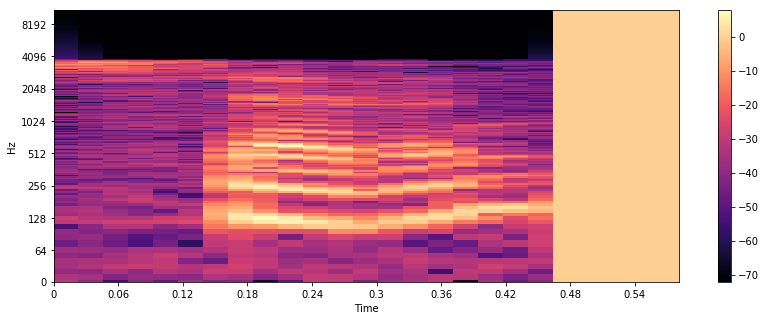

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(theo_specgrams[20,:,:], sr=sr, x_axis='time', y_axis='log')
plt.colorbar()